In [1]:
import pyforest

In [2]:
import networkx as nx

In [4]:
classes = pd.read_csv('Data/elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
edgelist = pd.read_csv('Data/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
features = pd.read_csv('Data/elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)

<IPython.core.display.Javascript object>

In [14]:
classes

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown
...,...,...
203764,173077460,unknown
203765,158577750,unknown
203766,158375402,1
203767,158654197,unknown


In [15]:
df = pd.merge(classes,features,how='inner',left_on='txId',right_on=0)

<IPython.core.display.Javascript object>

In [19]:
df = df.drop(columns=0)

In [22]:
df

,txId,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
0,230425980,unknown,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414005,-0.488340,-0.232553,-0.467554,0.048767,0.052956,-0.039149,-0.172895,-0.163126,-0.160932,-1.316342,-1.315388,-0.039144,-0.172884,-0.163115,-0.160925,-1.316333,-1.315375,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264376,-0.250523,-0.263703,1.133527,1.135947,-0.059013,-0.262368,-0.255111,-0.259194,1.125590,1.128038,-0.293773,-0.159732,0.034039,-0.183816,1.135523,1.135279,-0.169160,-0.201584,-0.116817,-0.191472,-0.014659,-0.018849,-1.457953,-1.494057,-0.083459,-1.485972,-0.088798,-0.090437,-0.166550,-0.216536,-0.134546,-0.194817,-0.003175,-0.004094,-1.096336,-1.267340,-0.349933,-1.230441,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.120950,-0.199145,-0.187993,-0.212948,1.064205,1.063787,-1.373782,-1.354735,-0.297975,-1.403698,1.342003,1.340733,-0.171601,-0.458162,-0.423588,-0.440883,-1.015963,-1.016230,-0.968903,-0.375715,0.759748,-0.768329,1.488113,1.487932,-0.216814,-0.605631,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,unknown,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.413965,-0.488307,-0.232553,-0.467516,0.048767,0.052956,-0.039151,-0.172895,-0.163126,-0.160933,0.923473,0.923011,-0.039146,-0.172884,-0.163114,-0.160926,0.923516,0.923110,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264425,-0.250574,-0.263753,-0.169119,-0.167165,-0.059013,-0.262424,-0.255168,-0.259251,-0.187191,-0.185274,-0.293692,-0.760700,-0.692777,-0.719789,-1.084907,-1.084845,-0.170113,-0.202332,-0.116817,-0.192405,-0.014659,-0.018849,-1.457921,-1.494024,-0.083459,-1.485939,-0.088798,-0.090437,-0.166550,-0.216536,-0.134546,-0.194817,-0.003175,-0.004094,-1.096336,-1.267340,-0.349933,-1.230441,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,unknown,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.0287

In [25]:
# Creating different classes

In [26]:
class_1 = df[df['class']=='1']['txId']

In [29]:
class_2 = df[df['class']=='2']['txId']

In [30]:
class_unknown = df[df['class']=='unknown']['txId']

In [54]:
if 30204891 in class_unknown:
    print('True')

In [55]:
df[df['txId']==30204891]

,txId,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
148219,30204891,1,37,-0.172371,-0.130306,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,-0.163018,-0.168842,-0.049707,-0.165323,-0.028741,-0.035391,-0.042955,-0.013282,-0.055332,-0.170669,-0.172524,-0.175541,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227178,-0.239333,-0.075256,-0.234914,0.037468,0.043444,-0.227164,-0.243198,-0.097895,-0.235857,0.036577,0.042345,-0.413213,-0.487681,-0.232553,-0.466794,0.048767,0.052956,-0.039151,-0.172895,-0.163126,-0.160933,0.923473,0.923011,-0.039146,-0.172884,-0.163115,-0.160926,0.923516,0.92311,-0.017032,-0.030026,-0.01764,-0.015071,-0.140763,-0.140335,-0.095403,-0.264416,-0.250565,-0.263744,-1.471764,-1.470277,-0.059013,-0.262415,-0.255159,-0.259242,-1.499972,-1.498585,-0.293839,-0.755528,-0.686457,-0.715224,-1.084907,-1.084845,-0.164868,-0.198215,-0.116817,-0.187273,-0.014659,-0.018849,0.866378,0.869486,-0.083459,0.871144,-0.088798,-0.090437,-0.100277,-0.166157,-0.134546,-0.131508,-0.003175,-0.004094,1.02386,0.787435,-0.349933,0.939106,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.02606,-0.02766,-0.078657,-0.135191,-0.097719,-0.115262,0.003143,0.002426,-0.123668,-0.194459,-0.181423,-0.208123,-1.159649,-1.160129,0.800251,0.568286,-0.267947,0.729316,-0.975738,-0.975237,-0.145014,0.258173,0.442248,0.26241,-1.015963,-1.01623,1.203124,1.192421,0.153209,1.356563,-1.116918,-1.116948,-0.216814,-0.034785,0.132831,-0.014407,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792


In [83]:
color_map = []
for node in list(graph.nodes):
    if node in class_1.values:
        color_map.append('blue')
    elif node in class_2.values: 
        color_map.append('green')
    else:
        color_map.append('grey')

In [84]:
len(color_map)

35

In [82]:
len(test)

35

In [75]:
test = list(graph.nodes)


In [78]:
type(class_1.values)

numpy.ndarray

In [56]:
test = [1,2,3,4,5]
test1 = [6,7,8,9,10]
test2 = [11,12,13]

rand = [1,11,9,4]

color_map = []
for i in rand:
    if i in test:
        color_map.append('blue')
    elif i in test1: 
        color_map.append('green')
    else:
        color_map.append('testing...')

In [57]:
color_map

['blue', 'testing...', 'green', 'blue']

In [49]:
graph.nodes

NodeView((30204891, 30204549, 29133205, 29131565, 28900605, 13735016, 28879339, 29035758, 46271143, 28907492, 30060590, 28862543, 28997148, 29865379, 29611862, 30151745, 29962122, 30172714, 29615095, 29581775, 39692773, 29133218, 28898970, 30061066, 29161611, 4336381, 39718243, 28900174, 28878820, 28877539, 30189290, 28953279, 28898351, 29132572, 28903935))

In [36]:
bad_ids = df.loc[(df[1] == 37) & (df['class'] == '1'), 'txId']
short_edges = edgelist.loc[edgelist['txId1'].isin(bad_ids)]

<IPython.core.display.Javascript object>

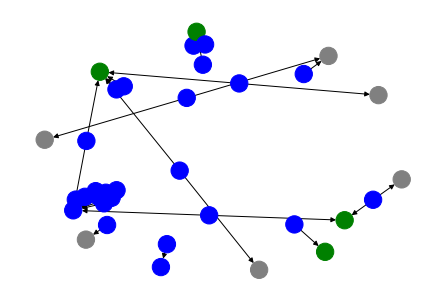

In [88]:
graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, cmap = plt.get_cmap('rainbow'), with_labels=False, pos=pos, node_color=color_map)

<IPython.core.display.Javascript object>

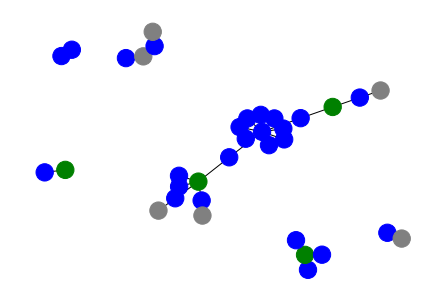

In [87]:
graph1 = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.Graph())
pos1 = nx.spring_layout(graph1)
nx.draw(graph1, cmap = plt.get_cmap('rainbow'), with_labels=False,node_color=color_map, pos=pos1)

In [89]:
pos

{30204891: array([-0.08419908, -0.58535898]),
 30204549: array([-0.11190995, -0.74477995]),
 29133205: array([0.03871422, 0.79876361]),
 29131565: array([0.05273207, 0.89519182]),
 28900605: array([-0.33953391, -0.26207432]),
 13735016: array([-0.51686562, -0.3493685 ]),
 28879339: array([-0.37485824, -0.30064183]),
 29035758: array([-0.02535657, -0.07246831]),
 46271143: array([ 0.34154426, -0.76388399]),
 28907492: array([ 0.11080662, -0.38398862]),
 30060590: array([ 0.73647023, -0.41835012]),
 28862543: array([-0.36627623, -0.22666376]),
 28997148: array([0.54764819, 0.60067379]),
 29865379: array([0.66187511, 0.72705374]),
 29611862: array([-0.28347962,  0.51517579]),
 30151745: array([-0.39402574,  0.61665242]),
 29962122: array([0.00720125, 0.43455266]),
 30172714: array([-0.64865555,  0.14276243]),
 29615095: array([0.24974767, 0.53517716]),
 29581775: array([ 0.5043431 , -0.44757054]),
 39692773: array([ 0.64629633, -0.638528  ]),
 29133218: array([0.08178122, 0.6657164 ]),
 2

In [94]:
def graphcreator(timestamp):

    bad_ids = df.loc[(df[1] == timestamp) & (df['class'] == '1'), 'txId']
    short_edges = edgelist.loc[edgelist['txId1'].isin(bad_ids)]

    graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
    pos = nx.spring_layout(graph)


    color_map = []
    for node in list(graph.nodes):
        if node in class_1.values:
            color_map.append('blue')
        elif node in class_2.values: 
            color_map.append('green')
        else:
            color_map.append('grey')
        
    nx.draw(graph, cmap = plt.get_cmap('rainbow'), with_labels=False, pos=pos, node_color=color_map)

<IPython.core.display.Javascript object>

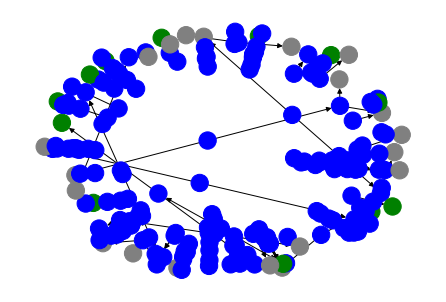

In [98]:
graphcreator(20)

<IPython.core.display.Javascript object>

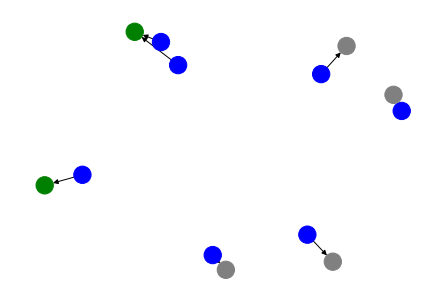

In [99]:
graphcreator(5)

<IPython.core.display.Javascript object>

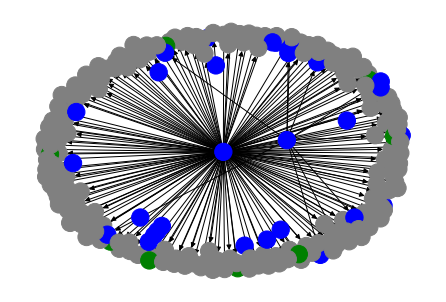

In [100]:
bad_ids = df.loc[(df[1] == 37) & (df['class'] == '1'), 'txId']
short_edges = edgelist.loc[edgelist['txId2'].isin(bad_ids)]

graph = nx.from_pandas_edgelist(short_edges, source = 'txId2', target = 'txId1', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)


color_map = []
for node in list(graph.nodes):
    if node in class_1.values:
        color_map.append('blue')
    elif node in class_2.values: 
        color_map.append('green')
    else:
        color_map.append('grey')
        
nx.draw(graph, cmap = plt.get_cmap('rainbow'), with_labels=False, pos=pos, node_color=color_map)

<IPython.core.display.Javascript object>

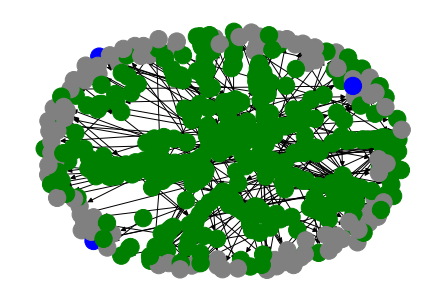

In [101]:
bad_ids = df.loc[(df[1] == 37) & (df['class'] == '2'), 'txId']
short_edges = edgelist.loc[edgelist['txId1'].isin(bad_ids)]

graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)


color_map = []
for node in list(graph.nodes):
    if node in class_1.values:
        color_map.append('blue')
    elif node in class_2.values: 
        color_map.append('green')
    else:
        color_map.append('grey')
        
nx.draw(graph, cmap = plt.get_cmap('rainbow'), with_labels=False, pos=pos, node_color=color_map)

<IPython.core.display.Javascript object>

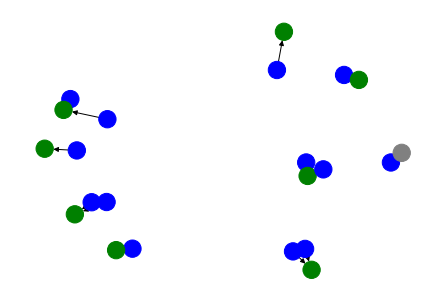

In [102]:
graphcreator(2)

<IPython.core.display.Javascript object>

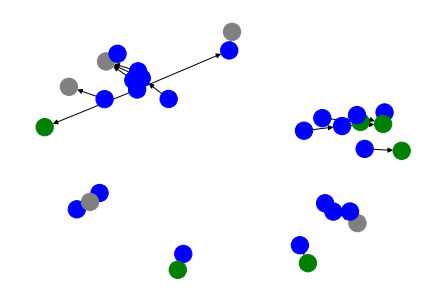

In [104]:
graphcreator(4)

<IPython.core.display.Javascript object>

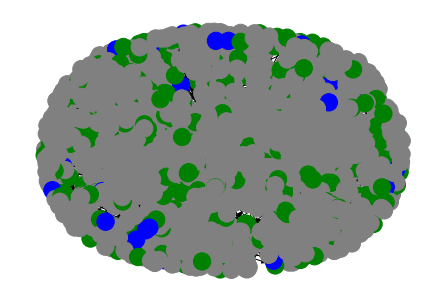

In [105]:
bad_ids = df.loc[(df[1] == 37), 'txId']
short_edges = edgelist.loc[edgelist['txId1'].isin(bad_ids)]

graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)


color_map = []
for node in list(graph.nodes):
    if node in class_1.values:
        color_map.append('blue')
    elif node in class_2.values: 
        color_map.append('green')
    else:
        color_map.append('grey')
        
nx.draw(graph, cmap = plt.get_cmap('rainbow'), with_labels=False, pos=pos, node_color=color_map)

<IPython.core.display.Javascript object>

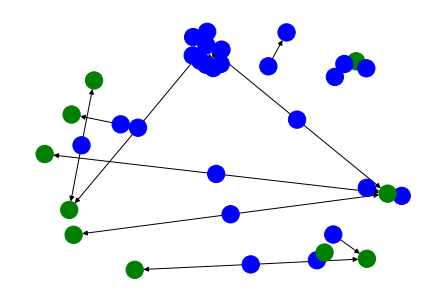

In [106]:
bad_ids = df.loc[(df[1] == 37) & (df['class'] == '1'), 'txId']
short_edges = edgelist.loc[edgelist['txId1'].isin(bad_ids)]

graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)


color_map = []
for node in list(graph.nodes):
    if node in class_1.values:
        color_map.append('blue')
    else:
        color_map.append('green')
        
nx.draw(graph, cmap = plt.get_cmap('rainbow'), with_labels=False, pos=pos, node_color=color_map)